# Name: Priyanka Bhatta , I'd : 2060036

# Kc_house_data analysis and prediction

Online property companies offer valuations of houses using machine learning techniques. The aim of this report is to predict the house sales in King County, Washington State, USA using Multiple Linear Regression (MLR). The dataset consisted of historic data of houses sold between May 2014 to May 2015.
We will predict the sales of houses in King County with an accuracy of at least 75-80% and understand which factors are responsible for higher property value - $650K and above.”

The dataset consists of house prices from King County an area in the US State of Washington, this data also covers Seattle. The dataset was obtained from Kaggle. This data was published/released under CC0: Public Domain. Unfortunately, the user has not indicated the source of the data. Please find the citation and database description in the Glossary and Bibliography.
The dataset consisted of 21 variables and 21613 observations.

# Explanation Code:

- id - Unique ID for each home sold
- date - Date of the home sale
- price - Price of each home sold
- bedrooms - Number of bedrooms
- bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
- sqft_living - Square footage of the apartments interior living space
- sqft_lot - Square footage of the land space
- floors - Number of floors
- waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
- view - An index from 0 to 4 of how good the view of the property was
- condition - An index from 1 to 5 on the condition of the apartment,
- grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of   construction and design, and 11-13 have a high quality level of construction and design.
- sqft_above - The square footage of the interior housing space that is above ground level
- sqft_basement - The square footage of the interior housing space that is below ground level
- yr_built - The year the house was initially built
- yr_renovated - The year of the house’s last renovation
- zipcode - What zipcode area the house is in
- lat - Lattitude
- long - Longitude
- sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
- sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors


# Importing the main libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm 
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,mean_squared_error,mean_absolute_error,r2_score

# Importing dataset

In [2]:
data = pd.read_csv('kc_house_data.csv') #storing the csv file in dataframe named data
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


# Data Cleaning

Let's drop the 'id' column. Not important for our work here.

In [3]:
data.drop('id',inplace=True,axis=1)
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
data.shape

(21613, 20)

There are 21613 rows and 20 columns total.

 What are the types of values stored in the columns? Let's see with what we're dealing with.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21611 non-null  float64
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

Now, I'll transform the 'date' column in a usefull column, spliting it in a Year column and Month column.

In [6]:
data['date'] = pd.to_datetime(data['date'])

In [7]:
data['Month'] = data['date'].apply(lambda date: date.month)
data['Year'] = data['date'].apply(lambda date: date.year)

Let's see the result.

In [8]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Month,Year
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015


If you notice, there's a numbers in the columns 'bathrooms' and 'floors' indicating a float numbers. Let's turn them on integers.

In [9]:
data['bathrooms'] = np.round(data['bathrooms'])
data['floors'] = np.round(data['floors'])

Let's see the result

In [10]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Month,Year
0,2014-10-13,221900.0,3,1.0,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
1,2014-12-09,538000.0,3,2.0,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014
2,2015-02-25,180000.0,2,1.0,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015
3,2014-12-09,604000.0,4,3.0,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014
4,2015-02-18,510000.0,3,2.0,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015


Is there some null data?

In [11]:
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
Month            0
Year             0
dtype: int64

Yes, just two.let's clean it.

In [12]:
data.dropna(inplace=True)

Let's drop the date column as I mentioned before.

In [13]:
data.drop('date',inplace=True,axis=1)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Month,Year
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.0,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014
2,180000.0,2,1.0,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015
3,604000.0,4,3.0,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014
4,510000.0,3,2.0,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015


In [14]:
data.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
Month            0
Year             0
dtype: int64

# Data Visualization

Text(0.5, 1.0, 'Distribution of Price')

<Figure size 720x720 with 0 Axes>

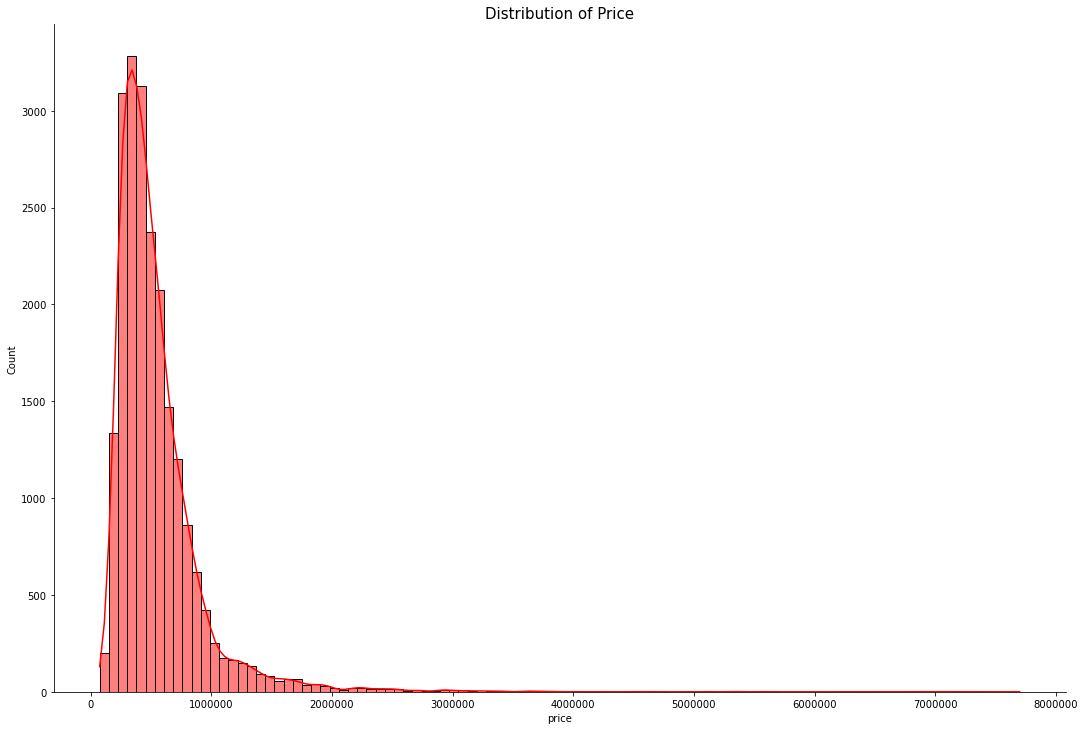

In [15]:
plt.figure(figsize=(10, 10))
sns.displot(x='price', data=data, bins=100, kde=True, height=10, aspect=1.5, color='red')
plt.ticklabel_format(style='plain', axis='x')
plt.title("Distribution of Price", fontsize=15)

Prices of houses are distributed in the range of  250k− 1000k.

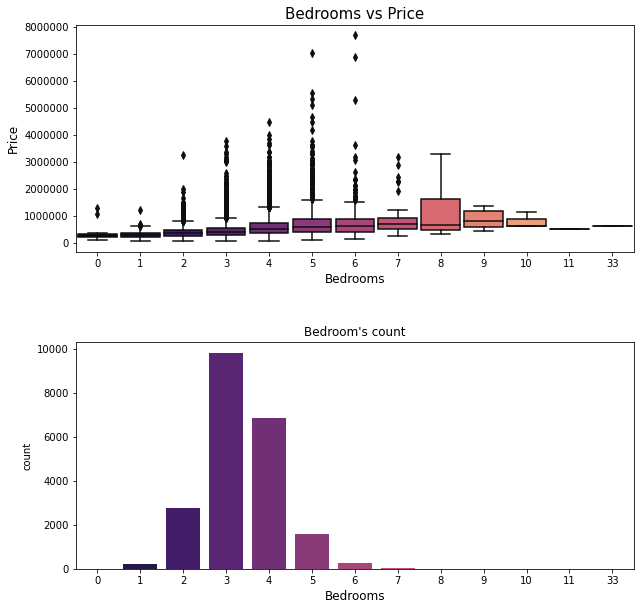

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize = (10, 10))

sns.boxplot(ax=axes[0], x='bedrooms', y='price', data=data, width=0.9, palette='magma')
axes[0].ticklabel_format(style='plain', axis='y')
axes[0].set_xlabel('Bedrooms', fontsize=12)
axes[0].set_ylabel('Price', fontsize=12)
axes[0].set_title('Bedrooms vs Price', fontsize=15)

sns.countplot(ax=axes[1], x='bedrooms', data=data, palette='magma')
axes[1].set_xlabel('Bedrooms', fontsize=12)
axes[1].set_title("Bedroom's count", fontsize=12)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

- Houses with number of bedrooms 2,3,4 tend to have higher house prices.
- The dataset contains maximum instances of houses having number of bedrooms 3 and 4.

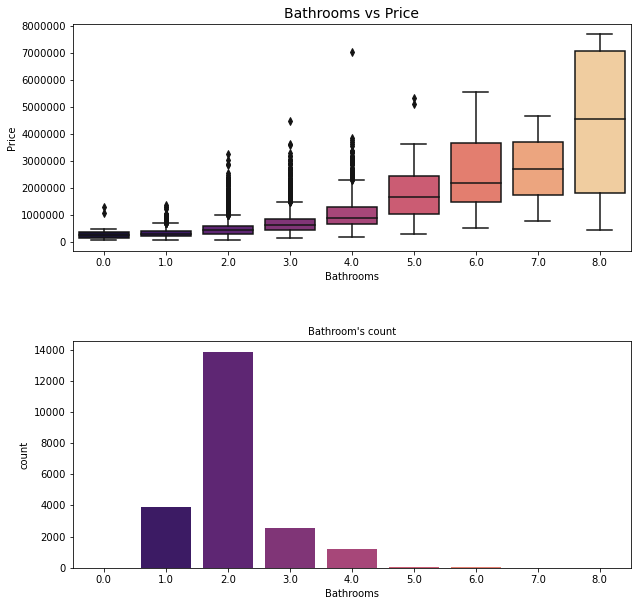

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

sns.boxplot(ax=axes[0], x='bathrooms', y='price', data=data, width=0.8, palette='magma')
axes[0].ticklabel_format(style='plain', axis='y')
axes[0].set_xlabel('Bathrooms', fontsize=10)
axes[0].set_ylabel('Price', fontsize=10)
axes[0].set_title('Bathrooms vs Price', fontsize=14)

sns.countplot(ax=axes[1], x='bathrooms', data=data, palette='magma')
axes[1].set_xlabel('Bathrooms', fontsize=10)
axes[1].set_title("Bathroom's count", fontsize=10)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

- As we can see from the above visualization, the more number of bathrooms a house has higher is the price of the house.
- The dataset have high instances of houses having 2.5 bathrooms.

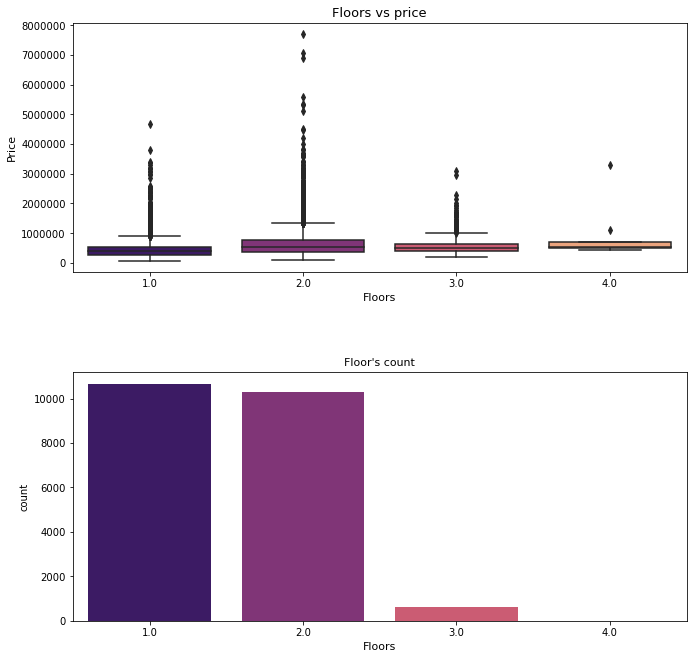

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(11, 11))

sns.boxplot(ax=axes[0], x='floors', y='price', data=data, palette='magma')
axes[0].ticklabel_format(style='plain', axis='y')
axes[0].set_xlabel('Floors', fontsize=11)
axes[0].set_ylabel('Price', fontsize=11)
axes[0].set_title('Floors vs price', fontsize=13)

sns.countplot(ax=axes[1], x='floors', data=data, palette='magma')
axes[1].set_xlabel('Floors', fontsize=11)
axes[1].set_title("Floor's count", fontsize=11)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

- Houses with 2.5 floors have higher prices.
- Datasets has more instances of houses having 1 and 2 floors.

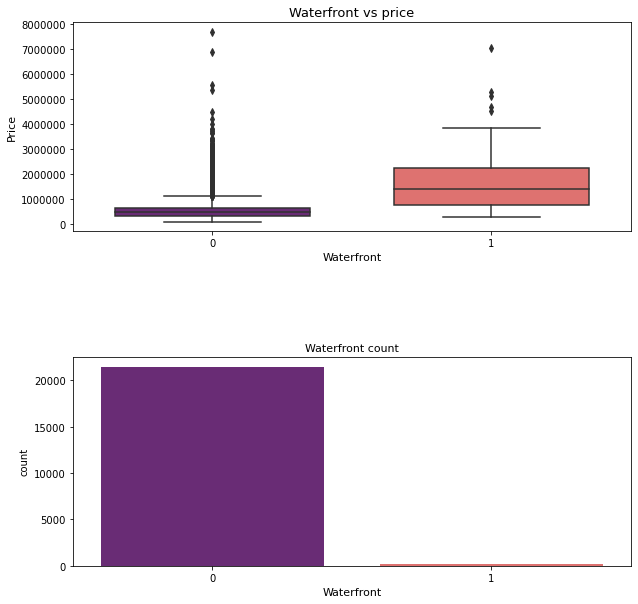

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

sns.boxplot(ax=axes[0], x='waterfront', y='price', data=data, width=0.7, palette='magma')
axes[0].ticklabel_format(style='plain', axis='y')
axes[0].set_xlabel('Waterfront', fontsize=11)
axes[0].set_ylabel('Price', fontsize=11)
axes[0].set_title('Waterfront vs price', fontsize=13)

sns.countplot(ax=axes[1], x='waterfront', data=data, palette='magma')
axes[1].set_xlabel('Waterfront', fontsize=11)
axes[1].set_title("Waterfront count", fontsize=11)
plt.subplots_adjust(wspace=0.6, hspace=0.6)

In [20]:
data.waterfront.value_counts()

0    21448
1      163
Name: waterfront, dtype: int64

- Houses facing water have higher prices than houses that don't face water.
- Datasets have high instances of house not facing water than houses facing one.

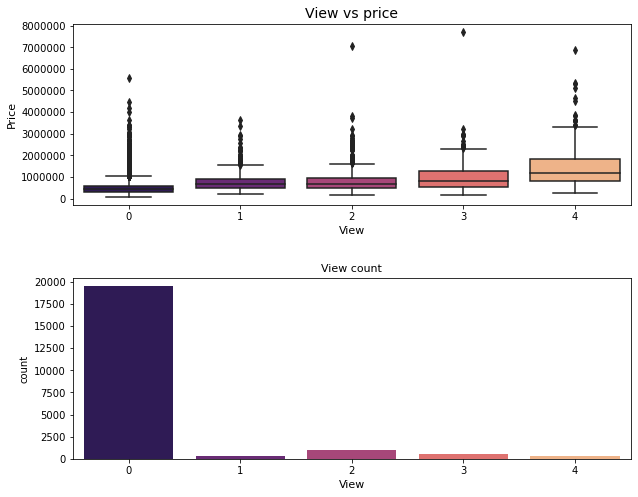

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

sns.boxplot(ax=axes[0], x='view', y='price', data=data, palette='magma')
axes[0].ticklabel_format(style='plain', axis='y')
axes[0].set_xlabel('View', fontsize=11)
axes[0].set_ylabel('Price', fontsize=11)
axes[0].set_title('View vs price', fontsize=14)

sns.countplot(ax=axes[1], x='view', data=data, palette='magma')
axes[1].set_xlabel('View', fontsize=11)
axes[1].set_title("View count", fontsize=11)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

- Houses with better view have high prices.

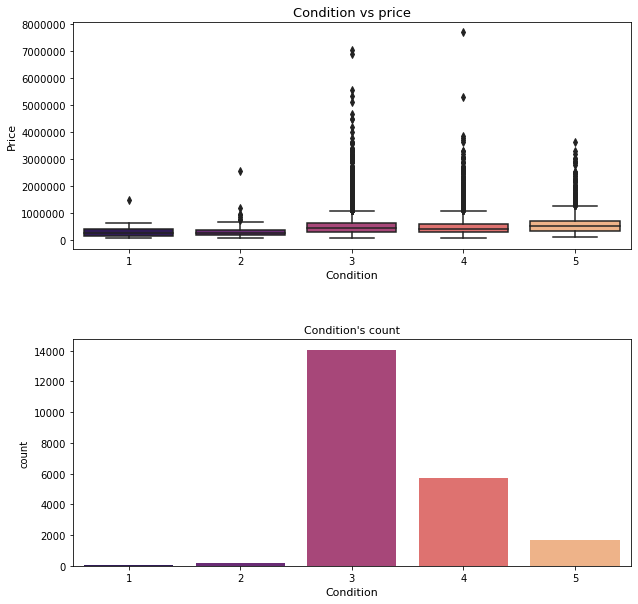

In [22]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

sns.boxplot(ax=axes[0], x='condition', y='price', data=data, palette='magma')
axes[0].ticklabel_format(style='plain', axis='y')
axes[0].set_xlabel('Condition', fontsize=11)
axes[0].set_ylabel('Price', fontsize=11)
axes[0].set_title('Condition vs price', fontsize=13)

sns.countplot(ax=axes[1], x='condition', data=data, palette='magma')
axes[1].set_xlabel('Condition', fontsize=11)
axes[1].set_title("Condition's count", fontsize=11)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

- Better the condition of a house higher is it price.
- Dataset has more instances of house having condition rated 3.

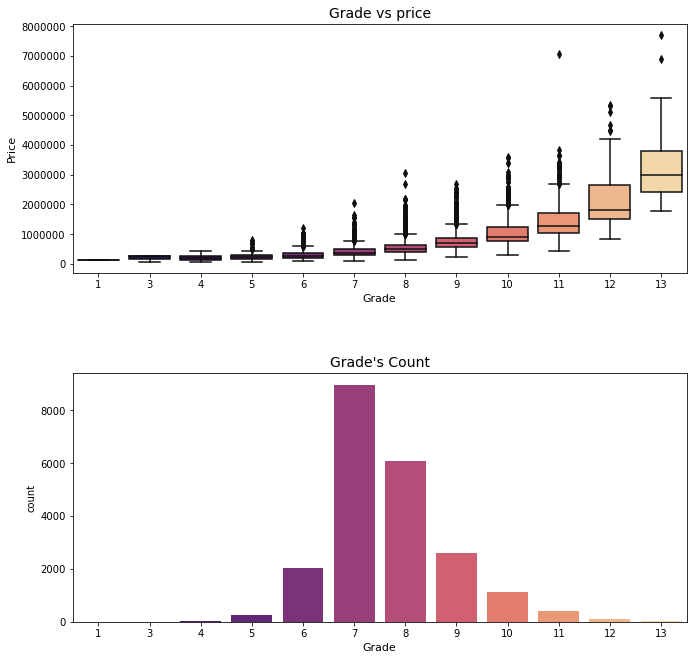

In [23]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(11, 11))

sns.boxplot(ax=axes[0], x='grade', y='price', data=data, palette='magma')
axes[0].ticklabel_format(style='plain', axis='y')
axes[0].set_xlabel('Grade', fontsize=11)
axes[0].set_ylabel('Price', fontsize=11)
axes[0].set_title('Grade vs price', fontsize=14)

sns.countplot(ax=axes[1], x='grade', data=data, palette='magma')
axes[1].set_xlabel('Grade', fontsize=11)
axes[1].set_title("Grade's Count", fontsize=14)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

- Higher the grade of the house higher is it price.

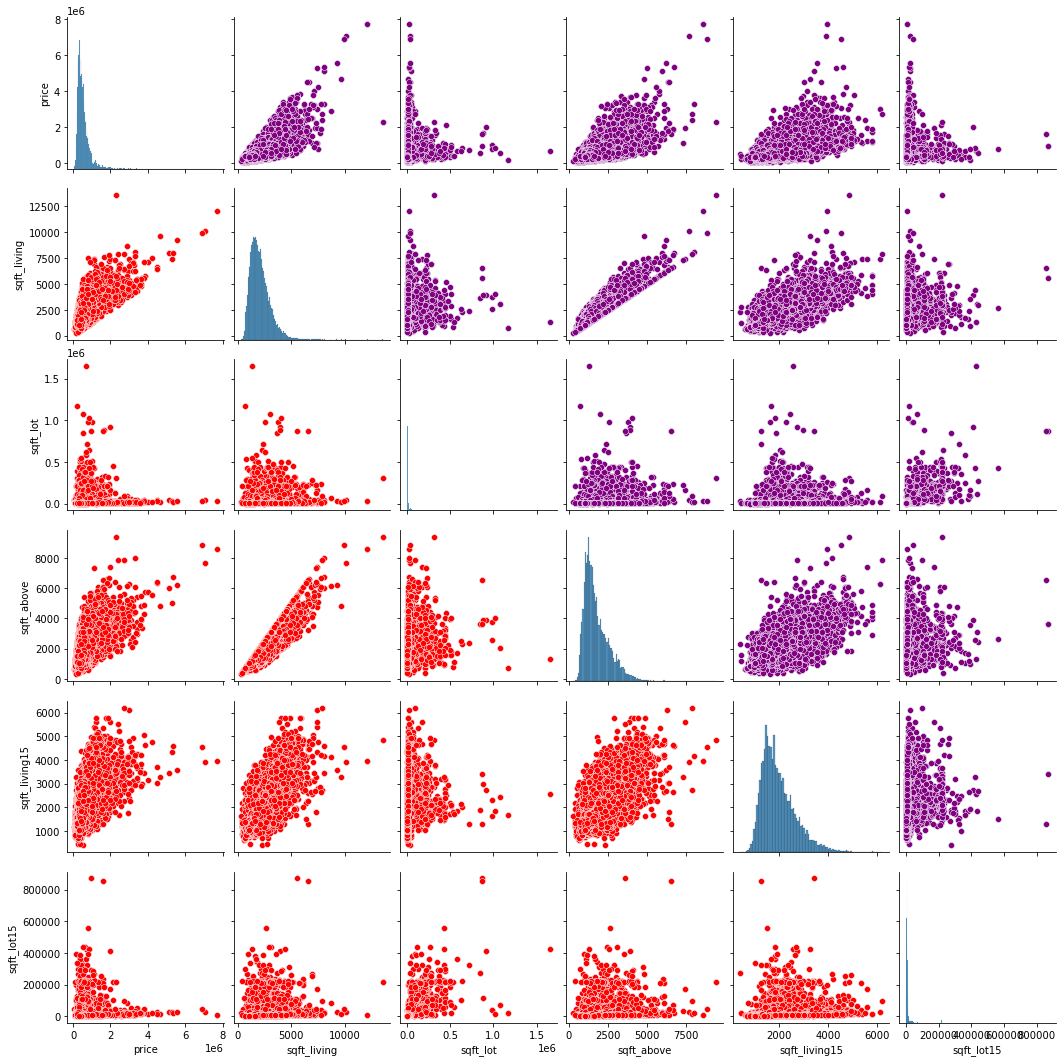

In [24]:
g = sns.pairplot(data[['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_living15', 'sqft_lot15']])
g.map_upper(sns.scatterplot, color='purple')
g.map_lower(sns.scatterplot, color='red')

In [25]:
#correlation of feature with respect to target variable
corr_matrix = data.corr()
corr_matrix['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.702064
grade            0.667463
sqft_above       0.605565
sqft_living15    0.585372
bathrooms        0.518946
view             0.397352
sqft_basement    0.323864
bedrooms         0.308355
lat              0.306925
waterfront       0.266332
floors           0.244915
yr_renovated     0.126445
sqft_lot         0.089656
sqft_lot15       0.082456
yr_built         0.053977
condition        0.036409
long             0.021557
Year             0.003527
Month           -0.010044
zipcode         -0.053147
Name: price, dtype: float64

Below, some of a few correlated features.

<AxesSubplot:>

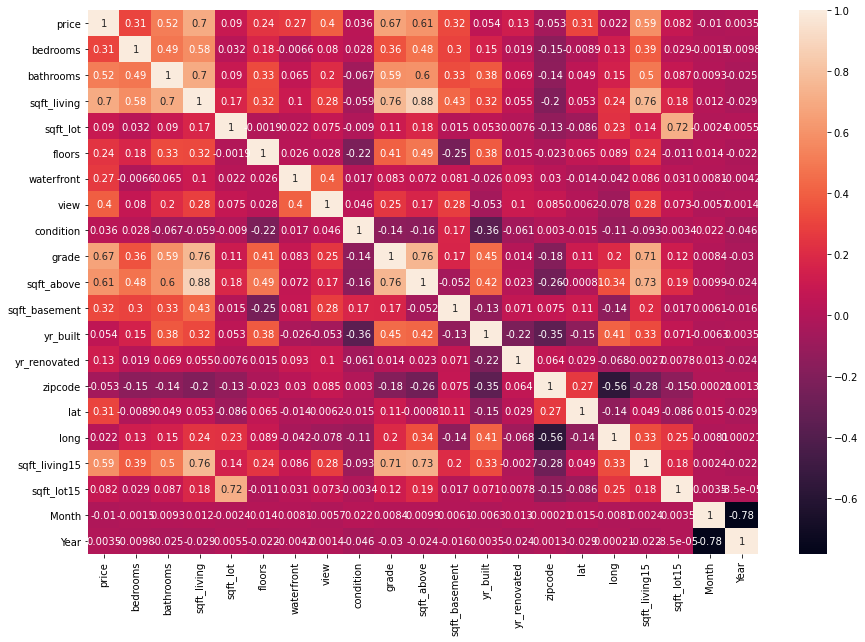

In [26]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True)

Now, let's see how the price changed along the years.

<AxesSubplot:xlabel='yr_built', ylabel='price'>

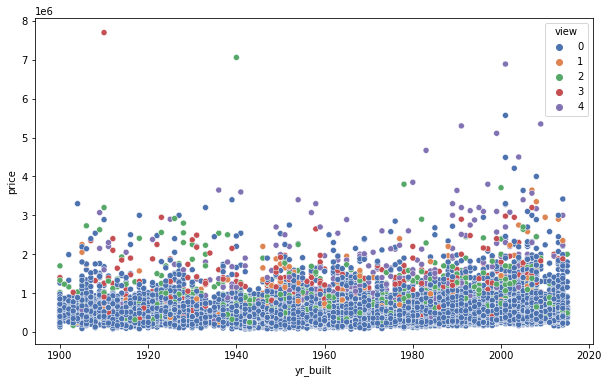

In [27]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='yr_built',y='price',data=data,hue='view',palette = 'deep')

A linear analysis showing us the increase of the price along the years.

<AxesSubplot:xlabel='Year', ylabel='price'>

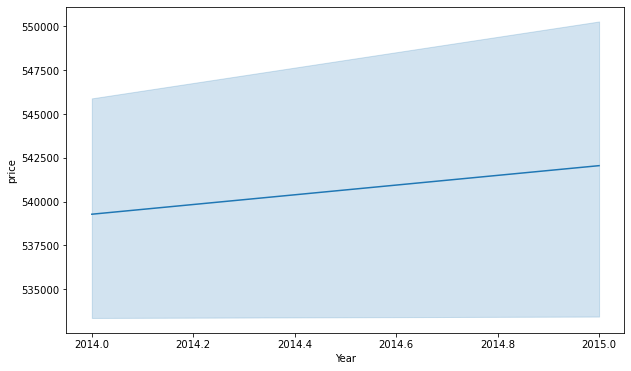

In [28]:
plt.figure(figsize=(10,6))
sns.lineplot(x='Year',y='price',data=data)

<Figure size 720x432 with 0 Axes>

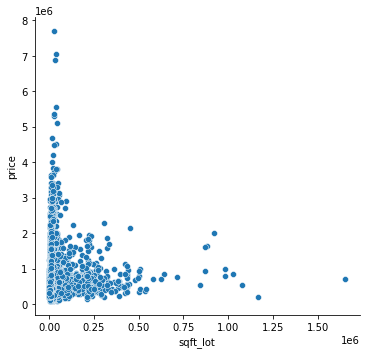

In [29]:
plt.figure(figsize=(10,6))
sns.relplot(x='sqft_lot',y='price',data=data,palette='terrain')

Now, let's do an analysis relating the number of rooms with a view to the price of the property.

In [30]:
print('Mean of 1 room with view: ',data.loc[(data['waterfront']==1)&(data['bedrooms']==1)]['price'].mean())

Mean of 1 room with view:  623280.0


In [31]:
print('Mean of 1 room without view: ',data.loc[(data['waterfront']==0)&(data['bedrooms']==1)]['price'].mean())

Mean of 1 room without view:  309781.1030927835


In [32]:
print('Mean of 2 rooms with view: ',data.loc[(data['waterfront']==1)&(data['bedrooms']==2)]['price'].mean())

Mean of 2 rooms with view:  919244.9032258064


In [33]:
print('Mean of 2 rooms without view: ',data.loc[(data['waterfront']==0)&(data['bedrooms']==2)]['price'].mean())

Mean of 2 rooms without view:  395505.1630633932


In [34]:
print('Mean of 3 rooms with view: ',data.loc[(data['waterfront']==1)&(data['bedrooms']==3)]['price'].mean())

Mean of 3 rooms with view:  1527234.375


In [35]:
print('Mean of 3 rooms without view: ',data.loc[(data['waterfront']==0)&(data['bedrooms']==3)]['price'].mean())

Mean of 3 rooms without view:  459298.6708679168


In [36]:
print('Mean of 4 rooms with view: ',data.loc[(data['waterfront']==1)&(data['bedrooms']==4)]['price'].mean())

Mean of 4 rooms with view:  1929262.5


In [37]:
print('Mean of 4 rooms without view: ',data.loc[(data['waterfront']==0)&(data['bedrooms']==4)]['price'].mean())

Mean of 4 rooms without view:  628022.3078497296


# Feature Selection

Feature selection is the process of reducing the number of input variables when developing a predictive model. 

In [38]:
X = data.iloc[:, 1:]
y = data.iloc[:, 0]

Feature Scaling

In [39]:
scaler_minmax = MinMaxScaler()
X_minmax = scaler_minmax.fit_transform(X)

# Let's start creating the model

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21611 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21611 non-null  float64
 1   bedrooms       21611 non-null  int64  
 2   bathrooms      21611 non-null  float64
 3   sqft_living    21611 non-null  int64  
 4   sqft_lot       21611 non-null  int64  
 5   floors         21611 non-null  float64
 6   waterfront     21611 non-null  int64  
 7   view           21611 non-null  int64  
 8   condition      21611 non-null  int64  
 9   grade          21611 non-null  int64  
 10  sqft_above     21611 non-null  float64
 11  sqft_basement  21611 non-null  int64  
 12  yr_built       21611 non-null  int64  
 13  yr_renovated   21611 non-null  int64  
 14  zipcode        21611 non-null  int64  
 15  lat            21611 non-null  float64
 16  long           21611 non-null  float64
 17  sqft_living15  21611 non-null  int64  
 18  sqft_l

Dropping floors and yr_renovated.

In [41]:
data_copy = data.copy()
data_copy = data_copy.drop(['floors', 'yr_renovated'], axis = 1)

In [42]:
data_copy.shape

(21611, 19)

In [43]:
data_copy.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,Month,Year
0,221900.0,3,1.0,1180,5650,0,0,3,7,1180.0,0,1955,98178,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.0,2570,7242,0,0,3,7,2170.0,400,1951,98125,47.7210,-122.319,1690,7639,12,2014
2,180000.0,2,1.0,770,10000,0,0,3,6,770.0,0,1933,98028,47.7379,-122.233,2720,8062,2,2015
3,604000.0,4,3.0,1960,5000,0,0,5,7,1050.0,910,1965,98136,47.5208,-122.393,1360,5000,12,2014
4,510000.0,3,2.0,1680,8080,0,0,3,8,1680.0,0,1987,98074,47.6168,-122.045,1800,7503,2,2015


In [44]:
X = data_copy.iloc[:, 1:]
y = data_copy.iloc[:, 0]

For training, 80% of te dataset is used and for testing 20% of the dataset is used. The independent attribute of train and test set is denoted by 'X'. The dependent attribute of train and test set is denoted by 'y'.

The output of this data is stored in X_train , X_test , y_train , y_test.

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [46]:
#Feature Scaling
X_train = scaler_minmax.fit_transform(X_train)
X_test = scaler_minmax.transform(X_test)

# Linear Regression

In [47]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [48]:
y_pred_lin = lin_reg.predict(X_test)

In [49]:
lin_rmse = (mean_squared_error(y_test, y_pred_lin))
lin_rmse = np.sqrt(lin_rmse)
lin_rmse

207808.41281611213

In [50]:
r2_score(y_test, y_pred_lin)

0.7112693879914269

In [51]:
results = pd.DataFrame(columns =['RMSE', 'R2_score'], 
                       index = ['Linear Regression'])

In [52]:
results.loc['Linear Regression'] = [round(lin_rmse, 2), r2_score(y_test, y_pred_lin)]

In [53]:
results

,RMSE,R2_score
Linear Regression,207808.41,0.711269


# Summary

Our model have accurately labeled 71% of the test data.  This is just the beginning however. I could try to increase the accuracy even higher by using a different algorithm other than the linear regression, or try my model with different set of variables. There are defintely many more things that could be done to modify my model, but I will conclude this report here for now.